In [1]:
import argparse
import pandas

# declare some column names
travelTime = 'travelTime'
startTime = 'startTime'
endTime = 'endTime'
id = 'personId'
tripNumber = 'tripNo'
mode = 'mainMode'
distance = 'distance'

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)

def read_csv(listOfFiles, listOfNames):
    
    assert(len(listOfFiles) == len(listOfNames)), 'number of files and scenario names should be equal but was: (' + str(len(listOfFiles)) + '/' + str(len(listOfNames)) + ')'
    
    result = []

    for file, name in zip(listOfFiles, listOfNames):
        scenario = pandas.read_csv(file, usecols=[id, tripNumber, distance, startTime, endTime, mode])
        scenario.set_index([id, tripNumber], inplace=True)
        scenario.sort_index(inplace=True)
        result.append(scenario)
    return result

In [2]:
dataPath = "C:\\Users\\Janekdererste\\run-analysis\\nemo_analysis\\"
args = parse_args([
    '-f', dataPath + 'deurb-no-drt.csv',
    '-n', 'Deurb no DRT'
])

dataFrames = read_csv(args.files, args.names)
data = pandas.concat(dataFrames, keys=args.names, names=['RunId', id, tripNumber])
data.head(10)

startTime  endTime      distance mainMode
RunId        personId tripNo                                           
Deurb no DRT 54804601 0         28430.0  28730.0    379.513114     walk
                      1         31332.0  31680.0    440.715401     walk
                      2         32181.0  32425.0    308.431821     walk
                      3         38834.0  39266.0    546.313731     walk
                      4         39266.0  39811.0    689.028682     walk
                      5         41687.0  42201.0    650.218648     walk
             54822301 0         23605.0  26243.0  19557.258771      car
                      1         48859.0  52201.0   9387.154289      car
                      2         53856.0  56215.0  12239.582256      car
             54847601 0         21487.0  24888.0  30006.526513      car

In [3]:
data['time'] = data['endTime'] - data['startTime']

walk_trips = data[(data.mainMode == 'walk')]
walk_trips.sort_values(by=['time'], inplace=True, ascending=False)
walk_trips.head(50)

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


startTime   endTime      distance mainMode  \
RunId        personId   tripNo                                               
Deurb no DRT 1017553701 3         32689.0  103240.0  89152.034090     walk   
             1011420201 1         46478.0  116827.0  88896.499815     walk   
             396723101  1         30403.0   92989.0  79086.767665     walk   
             578068901  2         60480.0  123026.0  79036.449231     walk   
             1020297201 1         48946.0  109797.0  76894.273673     walk   
             1170161901 2         59321.0  119217.0  75686.773366     walk   
             1265823501 1         69636.0  129489.0  75632.743738     walk   
             1011003801 1         35089.0   93373.0  73650.001356     walk   
             791485001  4         66564.0  124472.0  73175.210032     walk   
             1271995301 3         34433.0   91163.0  71686.363318     walk   
             1390532101 0         36667.0   93137.0  71358.241106     walk   
             1016774201 2         46380.0  102458.0  70862.476140     walk   
             793174101  0         32936.0   88551.0  70277.993085     walk   
             395590301  0         10865.0   65933.0  69586.088261     walk   
             1020569901 1         27544.0   81902.0  68689.386290     walk   
             1244109501 2         62875.0  114370.0  65071.577106     walk   
             715214601  1         40449.0   91839.0  64938.572416     walk   
             1432099401 1         54469.0  105461.0  64436.501333     walk   
             1149120601 3         72493.0  123074.0  63916.436922     walk   
             398927101  1         35100.0   85521.0  63714.483011     walk   
             1266192101 3         66187.0  115648.0  62501.905778     walk   
             1255391801 2         48476.0   97839.0  62377.088926     walk   
             1015185501 0         37966.0   87122.0  62116.211492     walk   
             1250930401 0         22988.0   71956.0  61878.038270     walk   
             1160985401 1         35008.0   83931.0  61822.140457     walk   
             1241021901 0         21420.0   69536.0  60801.443652     walk   
             387278701  2         43438.0   90897.0  59971.202888     walk   
             1251973301 0          9080.0   56529.0  59958.707753     walk   
             1016116101 4         63942.0  110720.0  59111.328515     walk   
             1257200701 0         27944.0   74067.0  58282.997424     walk   
             1377567301 4         62766.0  108649.0  57980.209031     walk   
             1261035001 2         53588.0   99429.0  57927.593971     walk   
             1165189401 6         66202.0  111937.0  57793.601319     walk   
             1028452501 0         17830.0   63470.0  57672.740812     walk   
             1374339301 0         20219.0   65479.0  57192.453477     walk   
             603541001  0         31783.0   76900.0  57012.171921     walk   
             1261436201 0         66524.0  111610.0  56973.200890     walk   
             1023658101 0         26148.0   71194.0  56922.233845     walk   
             1265222501 0         36624.0   81341.0  56507.074973     walk   
             724508701  4         46993.0   90891.0  55471.379047     walk   
             1222071701 4         64280.0  108143.0  55427.229367     walk   
             601624101  3         76704.0  120454.0  55285.275159     walk   
             1252952501 4         55450.0   98706.0  54660.351933     walk   
             612792901  1         27630.0   70800.0  54551.626964     walk   
             734374901  7         80004.0  122906.0  54212.538658     walk   
             1257723801 0         30480.0   73169.0  53944.404055     walk   
             1009784801 3         79993.0  122477.0  53684.651755     walk   
             935709701  5         77480.0  119775.0  53445.901940     walk   
             62442801   3         72618.0  114790.0  53291.234138     walk   
             1247175901 1         52601.0   94695.0  5

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


startTime  endTime    distance mainMode  time  \
RunId        personId   tripNo                                                  
Deurb no DRT 1012304601 0         47580.0  47588.0   11.098673     walk   8.0   
                        1         48008.0  48016.0   11.098673     walk   8.0   
             391322901  1         45475.0  45483.0   11.013797     walk   8.0   
                        0         44308.0  44316.0   11.013797     walk   8.0   
             620812501  0         45708.0  45719.0   14.882305     walk  11.0   
...                                   ...      ...         ...      ...   ...   
             83192001   6         52954.0  53049.0  119.183778     walk  95.0   
             1134877301 3         43200.0  43263.0   78.637335     walk  63.0   
             380086701  0         32646.0  32650.0    4.887535     walk   4.0   
             658702101  1         42667.0  42674.0    8.517435     walk   7.0   
                        0         42540.0  42547.0    8.517435     walk   7.0   

                                   speed  
RunId        personId   tripNo            
Deurb no DRT 1012304601 0       1.387334  
                        1       1.387334  
             391322901  1       1.376725  
                        0       1.376725  
             620812501  0       1.352937  
...                                  ...  
             83192001   6       1.254566  
             1134877301 3       1.248212  
             380086701  0       1.221884  
             658702101  1       1.216776  
                        0       1.216776  

[42785 rows x 6 columns]

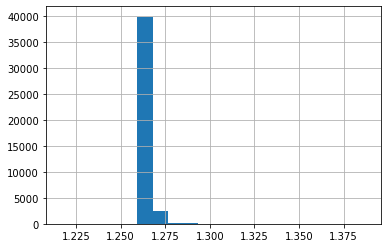

In [4]:
walk_trips['speed'] = walk_trips['distance'] / walk_trips['time']
walk_trips.sort_values(by=['speed'], inplace=True, ascending=False)
walk_trips['speed'].hist(bins=20)
walk_trips

startTime  endTime    distance mainMode  time  \
RunId        personId   tripNo                                                  
Deurb no DRT 1012304601 0         47580.0  47588.0   11.098673     walk   8.0   
                        1         48008.0  48016.0   11.098673     walk   8.0   
             391322901  1         45475.0  45483.0   11.013797     walk   8.0   
                        0         44308.0  44316.0   11.013797     walk   8.0   
             620812501  0         45708.0  45719.0   14.882305     walk  11.0   
...                                   ...      ...         ...      ...   ...   
             83192001   6         52954.0  53049.0  119.183778     walk  95.0   
             1134877301 3         43200.0  43263.0   78.637335     walk  63.0   
             380086701  0         32646.0  32650.0    4.887535     walk   4.0   
             658702101  1         42667.0  42674.0    8.517435     walk   7.0   
                        0         42540.0  42547.0    8.517435     walk   7.0   

                                   speed  
RunId        personId   tripNo            
Deurb no DRT 1012304601 0       1.387334  
                        1       1.387334  
             391322901  1       1.376725  
                        0       1.376725  
             620812501  0       1.352937  
...                                  ...  
             83192001   6       1.254566  
             1134877301 3       1.248212  
             380086701  0       1.221884  
             658702101  1       1.216776  
                        0       1.216776  

[42785 rows x 6 columns]

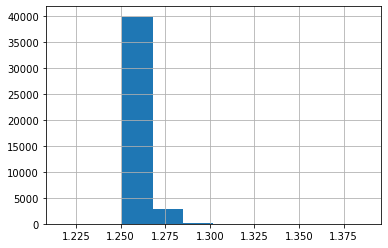

In [5]:
filtered = walk_trips.query('speed < 2 and speed > 1')
filtered['speed'].hist()
filtered

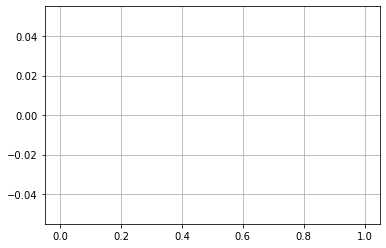

In [6]:
unplausible_walk_trips = walk_trips.query('speed > 2 or speed < 1')
unplausible_walk_trips
unplausible_walk_trips['speed'].hist(bins=100)

In [7]:
unstacked = unplausible_walk_trips.reset_index(level='personId')
unstacked

,,personId,startTime,endTime,distance,mainMode,time,speed
RunId,tripNo,,,,,,,


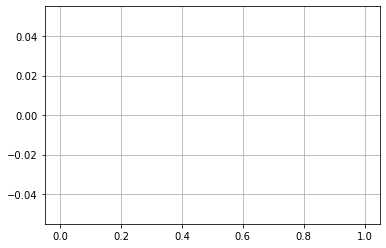

In [8]:
value_counts = unstacked['personId'].value_counts()
value_counts.hist()